<a href="https://colab.research.google.com/github/projjal1/Machine-Learning-Sklearn/blob/main/Mobile_Network_Attrition_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Motivation 
Telecom is nowadays a huge sector that involves stiff competition among services offered by companies.<br>
This problem task is to predict the attrition rate of customers based on variuos factors:<br>
Income, Months on network, Monthly bill .. etc

In [ ]:
import pandas as pd

In [ ]:
#Import dataset from Github repo
dataset=pd.read_csv("https://raw.githubusercontent.com/projjal1/datasets/master/Connect_Mobile__Attrition_Data_file.csv")
#Looking at few rows of data
dataset.head(5)

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85


In [ ]:
#No. of rows in dataset
print("No. of rows in dataset:",len(dataset))

No. of rows in dataset: 100000


In [ ]:
#There are no null columns
dataset.isnull().sum()

active_cust                   0
income                        0
expenditure                   0
months_on_network             0
Num_complaints                0
number_plan_changes           0
relocated                     0
monthly_bill                  0
technical_issues_per_month    0
Speed_test_result             0
dtype: int64

In [ ]:
#Seaborn library for visualization
import seaborn

In [ ]:
#Let's combine income and expenditure into one column 'savings'
dataset['savings']=dataset['income']-dataset['expenditure']
dataset.drop(['income','expenditure'],axis=1,inplace=True)

In [ ]:
#Looking at modified dataset 
dataset.head(5)

,active_cust,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result,savings
0,0,85,4,1,0,121,4,85,317.2
1,0,85,4,1,0,133,4,85,316.2
2,0,82,4,1,0,118,4,85,318.8
3,0,82,4,1,0,123,4,85,318.8
4,1,80,4,1,0,177,4,85,321.8


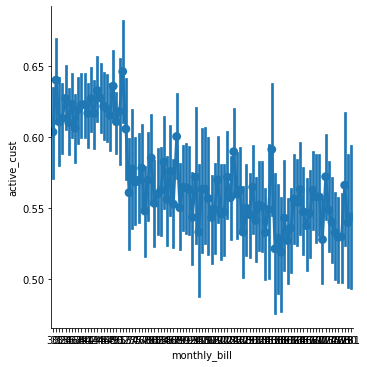

In [ ]:
seaborn.catplot(x='monthly_bill',y='active_cust',kind="point",data=dataset)

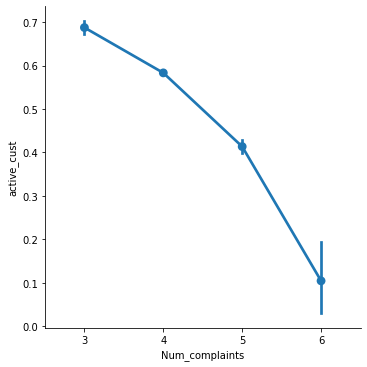

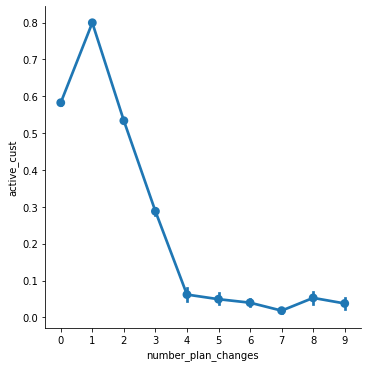

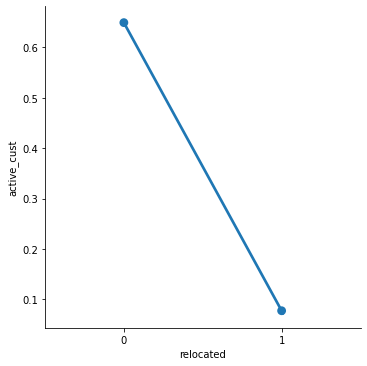

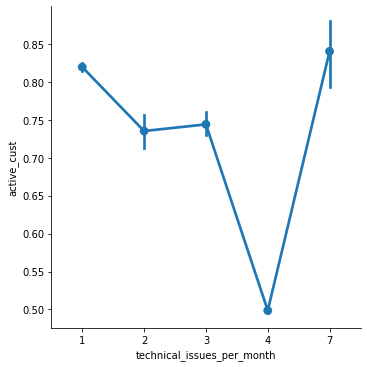

In [ ]:
#For each column we see that active customers decrease as stability is lost
for cols in ['Num_complaints','number_plan_changes','relocated','technical_issues_per_month']:
  seaborn.catplot(x=cols,y='active_cust',kind="point",data=dataset)

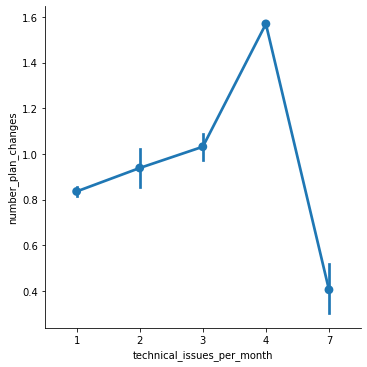

In [ ]:
#We see that as no. of technical issues increase plan change probability increases
#But at some point it decreases where we do not have much data points
seaborn.catplot(x='technical_issues_per_month',y='number_plan_changes',kind="point",
            data=dataset)

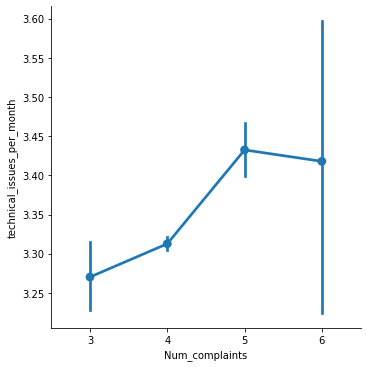

In [ ]:
#Thus we conclude the relationship is not linear
#And we cannot merge both columns into one categorical column
seaborn.catplot(x='Num_complaints',y='technical_issues_per_month',kind="point",
                data=dataset)

In [ ]:
#Split into labels and columns
labels=dataset['active_cust']
dataset.drop(['active_cust'],axis=1,inplace=True)

In [ ]:
#Looking at few labels and data
print(labels[:10])
dataset.head(4)

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: active_cust, dtype: int64


,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result,savings
0,85,4,1,0,121,4,85,317.2
1,85,4,1,0,133,4,85,316.2
2,82,4,1,0,118,4,85,318.8
3,82,4,1,0,123,4,85,318.8


In [ ]:
from sklearn.model_selection import train_test_split

#Split data into test,train and validation
train_x,test_x,train_y,test_y=train_test_split(dataset,labels,test_size=0.4)
val_x,test_x,val_y,test_y=train_test_split(test_x,test_y,test_size=0.5)

In [ ]:
print("No of records in train data:",len(train_x))
print("No of records in test data:",len(test_x))
print("No of records in validation data:",len(val_x))

No of records in train data: 60000
No of records in test data: 20000
No of records in validation data: 20000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=500)

In [ ]:
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("Accuracy on test data:",model.score(test_x,test_y))

Accuracy on test data: 0.8981


In [ ]:
#Obtaining predictions from model
predictions=model.predict(val_x)
true_values=val_y.values.ravel()

#Counter variable 
counter=0

#Counter for correct predictions
for x in range(len(true_values)):
  if predictions[x]==true_values[x]:
    counter+=1
print("Validation accuracy:",counter/len(true_values))

Validation accuracy: 0.9017
